In [11]:
#!pip install seaborn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
#To Allocate the Row/Column for Input based on Row/Column number

# Method Used : dataset.iloc[ : , :].values
#Range(n-1) will be act as Range for the Value mentioned at End 
#(Eg: if we, Mentioned 3:5, Only 03rd and 04th Columns will be Taken)

#1.The First List Symbol : represents the Rows of Dataset 
#(All the Rows would be taken, if left this Symbol : as Empty without Specifying anything)

#2.The Second List Symbol : represents the Columns of Dataset 
#(All the Columns would be taken, if left this Symbol : as Empty without Specifying anything)"

# if X = dataset.iloc[:, 3:5] is given with .value, the output will be in List/Array Format 
#(Recommended this method, since the data would only be acceptable, only if passed in List/Array Format)

X = dataset.iloc[:, 3:5].values

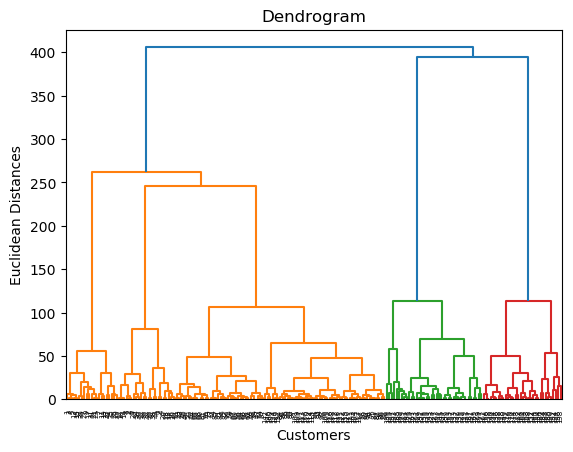

In [6]:
import scipy.cluster.hierarchy as sch

sch.dendrogram(sch.linkage(X, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering
clusModel = AgglomerativeClustering(n_clusters = 5)
label = clusModel.fit_predict(X)
label

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [9]:
#Will be Learned in Detail about pd.DataFrame(dataset) in Data Science
#Result will be same for both the Methods for Assigning the Dataset to a New Variable (supervised)
#supervised = pd.DataFrame(dataset) and supervised = (dataset)

supervised = pd.DataFrame(dataset)
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
#Creating a New Column - Cluster_group in Dataset and assigning the Predicted y_kmeans Means Value to this 
#New Column - Cluster_group

supervised['Cluster_group'] = label
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [11]:
supervised.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_group'],
      dtype='object')

In [12]:
supervised.columns[3]

'Annual Income (k$)'

In [13]:
supervised.columns[4]

'Spending Score (1-100)'

In [14]:
supervised.columns[5]

'Cluster_group'

C:\Anaconda\envs\AI_ML\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


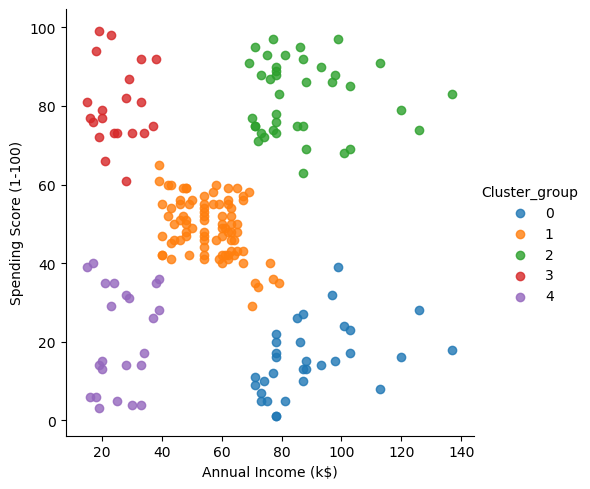

In [15]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)

#fit_reg=False Represents that Regression Need to be done or not
#legend=True Represents the Information of Colors for Respective Clusters
#legend_out=True Represents the Information of Colors for Respective Clusters to be Displayed Out of the Graph